In [28]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
"""
tf.GradientTape()

Tape graph를 그려주면, 알아서 연산을 해주게 된다. - forward 할떄 값을 backpropagation에서도 사용
"""

'\ntf.GradientTape()\n'

In [19]:
t1 =  tf.Variable([1,2,3], dtype = tf.float32)
t2 = tf.Variable([10,20,30], dtype = tf.float32)

with tf.GradientTape() as tape:
    t3 = t1 * t2
    t4 = t3 + t2
print(t1.numpy())
print(t2.numpy())
print(t3.numpy())

[1. 2. 3.]
[10. 20. 30.]
[10. 40. 90.]


In [20]:
gradients = tape.gradient(t4, [t1, t2, t3])  # t3에 대해서 t1과 t2의 편비분 구하기
# tape에 gradient를 계산해서 넣어주기

print(type(gradients))
print('dt1: ',gradients[0])
print('dt2: ',gradients[1])
print('dt3: ',gradients[2])

<class 'list'>
dt1:  tf.Tensor([10. 20. 30.], shape=(3,), dtype=float32)
dt2:  tf.Tensor([2. 3. 4.], shape=(3,), dtype=float32)
dt3:  tf.Tensor([1. 1. 1.], shape=(3,), dtype=float32)


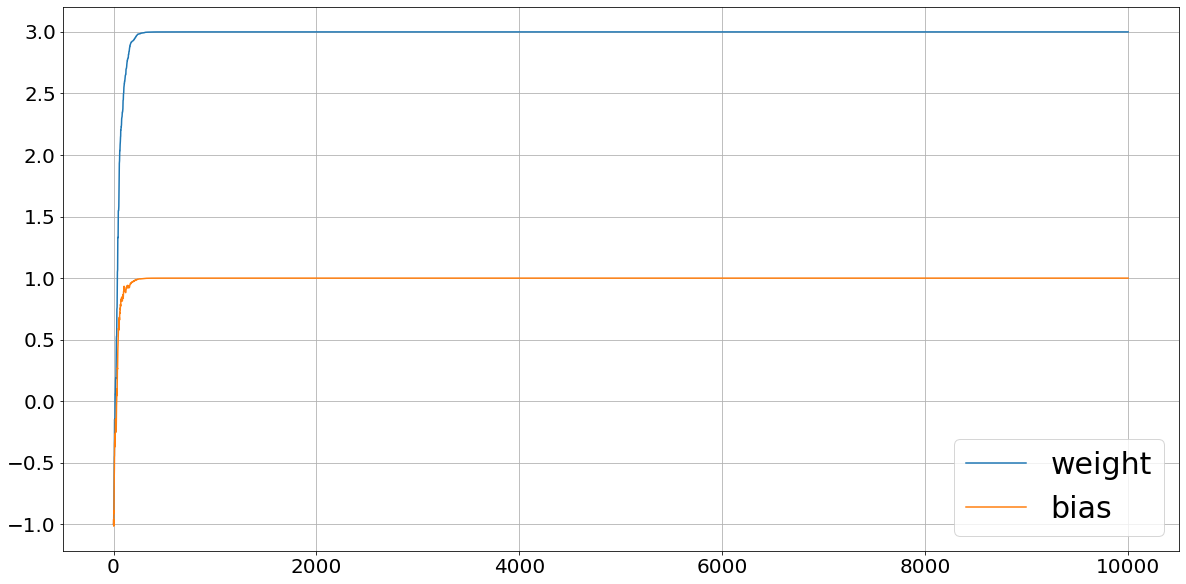

In [33]:
x_data  = tf.random.normal(shape = (1000,), dtype = tf.float32)
y_data = 3*x_data + 1

w = tf.Variable(-1.)
b = tf.Variable(-1.)

learning_rate = 0.01
EPOCHS = 10
w_trace, b_trace =[], []

for epoch in range(EPOCHS):
    for x, y in zip(x_data, y_data):
        with tf.GradientTape() as tape:
            prediction = w * x + b
            loss  = (prediction - y) ** 2
        gradients = tape.gradient(loss, [w,b])

        w_trace.append(w.numpy())
        b_trace.append(b.numpy())

        w = tf.Variable(w - learning_rate * gradients[0])
        b = tf.Variable(b - learning_rate * gradients[1])
fig, ax = plt.subplots(figsize = (20,10))
ax.plot(w_trace, label = 'weight')
ax.plot(b_trace, label = "bias")
ax.tick_params(labelsize = 20)
ax.legend(fontsize = 30)
ax.grid()